In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

# Chest X-Ray Pneumonia Prediction

(1858, 2090)

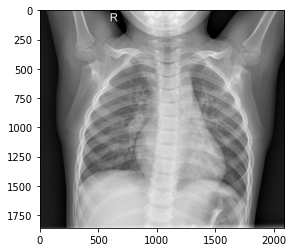

In [2]:
# Sample normal image
path = 'data/chest_pneumonia/train/normal'
img = cv2.imread(path + '/IM-0115-0001.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img, cmap='gray')
img.shape

In [3]:
# Basic info of the image
print('Image size:', img.shape)
print('Image data type:', img.dtype)

Image size: (1858, 2090)
Image data type: uint8


(250, 500)

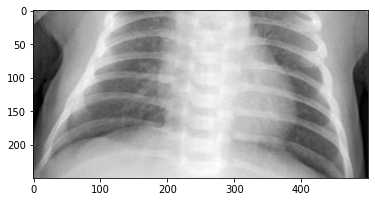

In [4]:
# Sample virus pneumonia image
path = 'data/chest_pneumonia/train/pneumonia'
img2 = cv2.imread(path + '/person281_virus_578.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img2, cmap='gray')
img2.shape

(439, 712)

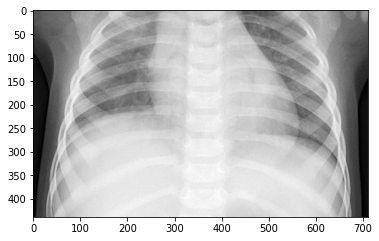

In [5]:
# Sample bacterial pneumonia image
path = 'data/chest_pneumonia/train/pneumonia'
img3 = cv2.imread(path + '/person1_bacteria_1.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img3, cmap='gray')
img3.shape

In [6]:
# Path Stuff
path = 'data/chest_pneumonia'
in_list = os.listdir(path) # This returns a list with all of the elements of the path
in_list

['.DS_Store', 'test', 'train']

In [7]:
path = 'data/chest_pneumonia'
for i in os.listdir(path):
    if i != '.DS_Store':
        path2 = path + '/' + i
        for j in os.listdir(path2):
            if j != '.DS_Store':
                path3 = path2 + '/' + j
                print('\n' + path3)
                cont = 0
                    


data/chest_pneumonia/test/pneumonia

data/chest_pneumonia/test/normal

data/chest_pneumonia/train/pneumonia

data/chest_pneumonia/train/normal


In [8]:
# convert the grayscale image to binary image
ret, thresh = cv2.threshold(img ,127,255,0)

# calculate moments of binary image
M = cv2.moments(thresh)

# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

# put text and highlight the center
cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

# Image processing

## Adjusting so all images are the same size

(1608, 1590)

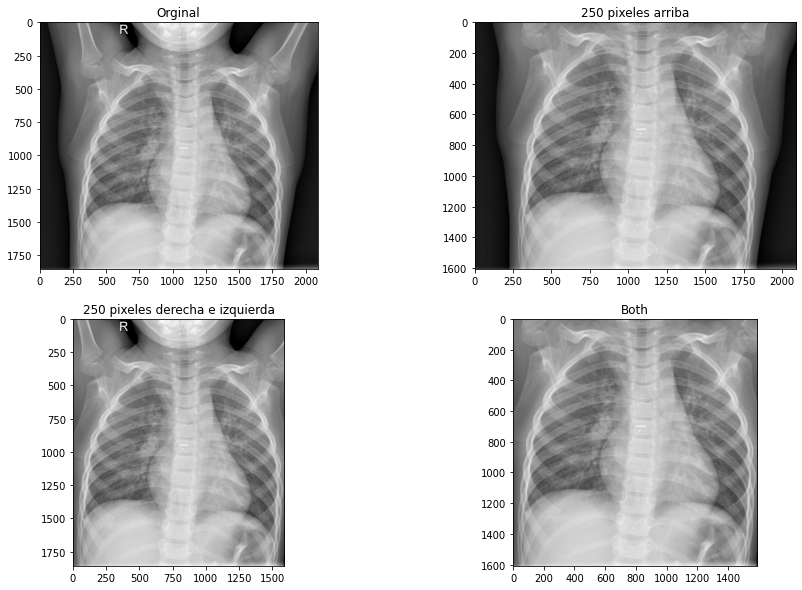

In [9]:
# Test to see if any information is lost when cropping
plt.figure(figsize=[15, 10])
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Orginal')
plt.subplot(222)
plt.imshow(img[250:,:], cmap='gray')
plt.title('250 pixeles arriba')
plt.subplot(223)
plt.imshow(img[:, 250:-250], cmap='gray')
plt.title('250 pixeles derecha e izquierda')
plt.subplot(224)
plt.imshow(img[250:, 250:-250], cmap='gray')
plt.title('Both')
img[250:, 250:-250].shape

In [10]:
# Normal training images

import statistics as stat
sizes = []
shapes = []
rows = []
cols = []
paths = []
labels = []
path_norm = 'data/chest_pneumonia/train/normal'
for i in os.listdir(path_norm):
    image = cv2.imread(path_norm + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_norm + '/' + i)
    labels.append('Healthy')
    rows.append(image.shape[0])
    cols.append(image.shape[1])
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', stat.median(shapes))

Total images: 1349
Largest image: 7532028 pixels, shape: (2663, 2373)
Smallest image: 612864 pixels, shape:  (672, 912)
Mean image size: 2384345 pixels
Median image size: 2164036 pixels, shape:  (1325, 1812)


In [11]:
# Pneumonia training images

path_pneu = 'data/chest_pneumonia/train/pneumonia'
for i in os.listdir(path_pneu):
    image = cv2.imread(path_pneu + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_pneu + '/' + i)
    rows.append(image.shape[0])
    cols.append(image.shape[1])
    if 'bact' in i:
        labels.append('Bacterial')
    elif 'vir' in i:
        labels.append('Virus')
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', sorted(shapes)[int(len(shapes) / 2)])

Total images: 5232
Largest image: 7532028 pixels, shape: (2663, 2373)
Smallest image: 48768 pixels, shape:  (127, 384)
Mean image size: 1403869 pixels
Median image size: 1141800.0 pixels, shape:  (888, 1312)


In [12]:
train_df = pd.DataFrame({'path': paths, 'shape': shapes, 'rows': rows, 'columns': cols, 'label': labels})
train_df.to_csv('training_data.csv', index=False)

In [13]:
pd.read_csv('training_data.csv')

,path,shape,rows,columns,label
0,data/chest_pneumonia/train/normal/NORMAL2-IM-0...,"(2234, 2359)",2234,2359,Healthy
1,data/chest_pneumonia/train/normal/NORMAL2-IM-1...,"(1067, 1422)",1067,1422,Healthy
2,data/chest_pneumonia/train/normal/IM-0427-0001...,"(1357, 1828)",1357,1828,Healthy
3,data/chest_pneumonia/train/normal/NORMAL2-IM-1...,"(1495, 1854)",1495,1854,Healthy
4,data/chest_pneumonia/train/normal/IM-0656-0001...,"(1966, 2194)",1966,2194,Healthy
...,...,...,...,...,...
5227,data/chest_pneumonia/train/pneumonia/person142...,"(1192, 1720)",1192,1720,Virus
5228,data/chest_pneumonia/train/pneumonia/person364...,"(952, 1304)",952,1304,Bacterial
5229,data/chest_pneumonia/train/pneumonia/person132...,"(712, 1112)",712,1112,Virus
5230,data/chest_pneumonia/train/pneumonia/person772...,"(592, 1000)",592,1000,Virus


In [5]:
# Normal test images
import statistics as stat
sizes = []
shapes = []
paths = []
labels = []
rows = []
cols = []
path_norm = 'data/chest_pneumonia/test/normal'
for i in os.listdir(path_norm):
    image = cv2.imread(path_norm + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_norm + '/' + i)
    labels.append('Healthy')
    rows.append(image.shape[0])
    cols.append(image.shape[1])
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', int(stat.median(sizes)), 'pixels, shape: ',  sorted(shapes)[int(len(shapes) / 2)])

Total images: 234
Largest image: 6828621 pixels, shape: (2713, 2517)
Smallest image: 488064 pixels, shape:  (496, 984)
Mean image size: 2608497 pixels
Median image size: 2327083 pixels, shape:  (1318, 1754)


In [6]:
# Pneumonia test images

path_pneu = 'data/chest_pneumonia/test/pneumonia'
for i in os.listdir(path_pneu):
    image = cv2.imread(path_pneu + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_pneu + '/' + i)
    rows.append(image.shape[0])
    cols.append(image.shape[1])
    if 'bact' in i:
        labels.append('Bacterial')
    elif 'vir' in i:
        labels.append('Virus')
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', sorted(shapes)[int(len(shapes) / 2)])

Total images: 624
Largest image: 6828621 pixels, shape: (2713, 2517)
Smallest image: 267904 pixels, shape:  (344, 888)
Mean image size: 1545010 pixels
Median image size: 1087328.0 pixels, shape:  (871, 1206)


In [7]:
test_df = pd.DataFrame({'path': paths, 'shape': shapes, 'rows': rows, 'columns': cols, 'label': labels})
test_df.to_csv('test_data.csv', index=False)

In [8]:
test_df.tail()

,path,shape,rows,columns,label
619,data/chest_pneumonia/test/pneumonia/person120_...,"(688, 1024)",688,1024,Bacterial
620,data/chest_pneumonia/test/pneumonia/person171_...,"(672, 1088)",672,1088,Bacterial
621,data/chest_pneumonia/test/pneumonia/person109_...,"(808, 1256)",808,1256,Bacterial
622,data/chest_pneumonia/test/pneumonia/person83_b...,"(648, 912)",648,912,Bacterial
623,data/chest_pneumonia/test/pneumonia/person112_...,"(640, 952)",640,952,Bacterial


## Augmentation in case labels have different amounts of images

In [18]:
path_pneu = 'data/chest_pneumonia/train/pneumonia'
path_norm = 'data/chest_pneumonia/train/normal'
vir = 0
bact = 0
norm = len(os.listdir(path_norm))
for i in os.listdir(path_pneu):
    if 'virus' in i: 
        vir += 1
    elif 'bacteria' in i:
        bact += 1
print('Train images:\n')
print('Normal Images:', norm)
print('Virus images:', vir)
print('Bacteria images:', bact)    
print('Total:', norm + vir + bact)   

Train images:

Normal Images: 1349
Virus images: 1345
Bacteria images: 2538
Total: 5232


In the training set, normal images and virus pneumonia images are equated, but bacterial pneumonia images are a lot higher, this can lead to our model being biased, so we will have to augment the normal and virus images to have a similar or equal number of images

In [19]:
path_pneu = 'data/chest_pneumonia/test/pneumonia'
path_norm = 'data/chest_pneumonia/test/normal'
vir = 0
bact = 0
norm = len(os.listdir(path_norm))
for i in os.listdir(path_pneu):
    if 'virus' in i: 
        vir += 1
    elif 'bacteria' in i:
        bact += 1
print('Test images:\n')
print('Normal Images:', norm)
print('Virus images:', vir)
print('Bacteria images:', bact)
print('Total:', norm + vir + bact)  

Test images:

Normal Images: 234
Virus images: 148
Bacteria images: 242
Total: 624


### Rotations

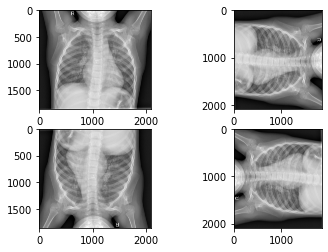

In [20]:
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow (cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE), cmap='gray')
plt.subplot(223)
plt.imshow(cv2.rotate(img, cv2.ROTATE_180), cmap='gray')
plt.subplot(224)
plt.imshow (cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE), cmap='gray')

## Adjusting contrast of images

# Bulding the Neural Net